In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [12]:
api_key = 'GZ6PMA77OKTY8X96'

# Initializing
ts = TimeSeries(key=api_key, output_format='pandas')

# Fetching full daily historical data
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Converting index to datetime
data.index = pd.to_datetime(data.index)
data = data.sort_index()

dataa = data.loc["2015-01-01":"2025-07-14"]

dataa = dataa.rename(columns={
    '1. open': 'open',
    '2. high': 'high',
    '3. low': 'low',
    '4. close': 'close',
    '5. volume': 'volume'
})

# Reset index to have 'Date' as a column
dataa = dataa.reset_index().rename(columns={'date': 'Date'})
dataa.head()

,Date,open,high,low,close,volume
0,2015-01-02,111.39,111.44,107.350,109.33,53204626.0
1,2015-01-05,108.29,108.65,105.410,106.25,64285491.0
2,2015-01-06,106.54,107.43,104.630,106.26,65797116.0
3,2015-01-07,107.20,108.20,106.695,107.75,40105934.0
4,2015-01-08,109.23,112.15,108.700,111.89,59364547.0


In [13]:
ma_100_days = dataa['close'].rolling(window=100).mean()

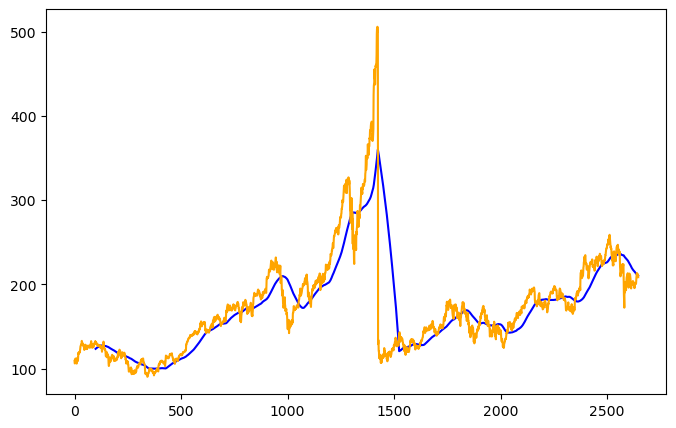

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(ma_100_days, label='100-Day Moving Average', color='blue')
plt.plot(dataa.close, label='Close Price', color='orange')
plt.show()

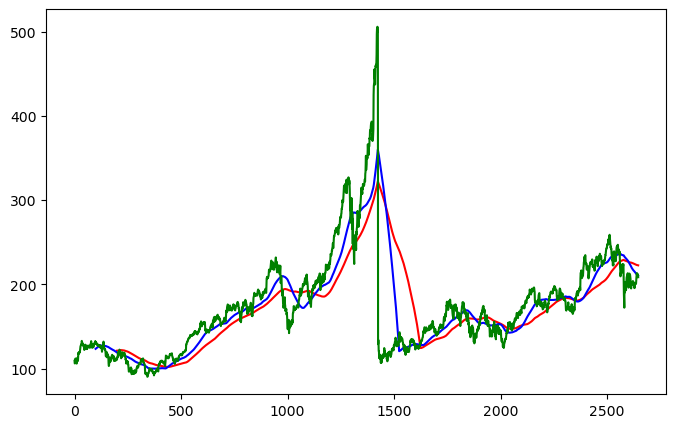

In [18]:
ma_200_days = dataa['close'].rolling(window=200).mean()
plt.figure(figsize=(8, 5))
plt.plot(ma_200_days, label='200-Day Moving Average', color='red')
plt.plot(ma_100_days, label='100-Day Moving Average', color='blue')
plt.plot(dataa.close, label='Close Price', color='green')
plt.show()